# Homework #4 -- Tuned Class B operation
 Part D
 
 Assuming that:
 $ \eta_{max} = \frac{P_{out}-P_{in}}{P_{dc}} $
 
 For a tuned Class B amplifier:
 $ \eta_{max} = \left(1-\frac1G\right)*\frac{\pi (V_{br}-V_k)}{8V_s} $

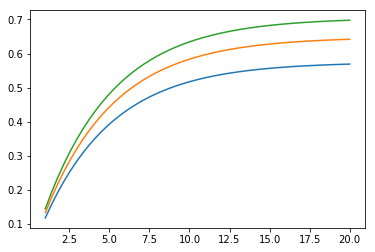

In [6]:

import numpy as np
import matplotlib.pyplot as plt

#Initial Declaration of constants
Vk = 5
Vp = 3.5 
VΦ = 0.7 

GdB = np.linspace(1,20,50)
Vdgb = np.array([40,60,100])

# For Class B 
#Breakdown voltage
def Vbr(Vdgb):
    return Vdgb - 2*abs(Vp) - VΦ

# Source voltage? changes whether it's class B resistive or tuned 
def Vs(Vdgb):
    return (Vbr(Vdgb) + Vk)/2   

#Efficiency Redone for Class B tuned
def Nmax(Vdgb,GdB):
    return (np.pi/8)*(1-1/(10**(GdB/10)))*(Vbr(Vdgb)-Vk)/(Vs(Vdgb))

for v in Vdgb:
    plt.plot(GdB,Nmax(v,GdB))
plt.show()


# Part E
 $R_{opt} = \frac{V_{br} - V_k}{I_F}$

Vdgb = 40 => R_opt = 2.7299999999999995
Vdgb = 60 => R_opt = 4.7299999999999995
Vdgb = 100 => R_opt = 8.73


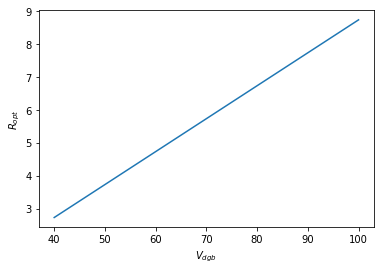

In [2]:
If = 10

def Ropt(Vdgb):
    return (Vbr(Vdgb)-Vk)/If

for v in Vdgb:
    print("Vdgb = {} => R_opt = {}".format(v,Ropt(v)))

plt.plot(Vdgb,Ropt(Vdgb))
plt.ylabel("$R_{opt}$")
plt.xlabel("$V_{dgb}$")
plt.show()

 Part F: I

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()


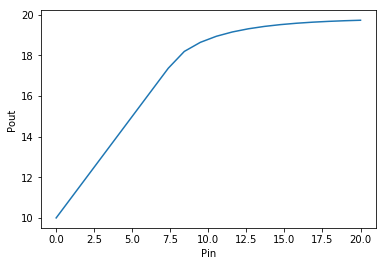

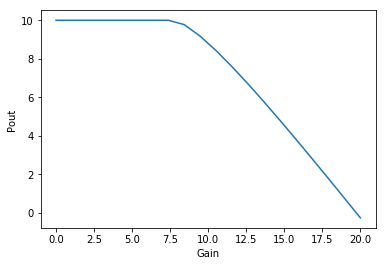

In [3]:
Pin = np.linspace(0,20,20)
Pin_lin = 10**(Pin/10)

GdB = 10 
Glin = 10**(GdB/10)
Vdgb = 60

Pmax_lin = (Vbr(Vdgb)-Vk)*If/8
Pmax_in_lin = Pmax_lin/Glin
Pmax_in_lin_dB = 10*np.log10(Pmax_in_lin)

def z(Pin_lin):
    return np.sqrt(Pmax_in_lin/Pin_lin)

def f(Pin_lin):
    return (1-(2/np.pi)*np.arccos(z(Pin_lin))+(1/np.pi)*np.sin(2*np.arccos(z(Pin_lin))))**2

def Gnl(Pin_lin):
    return Glin*f(Pin_lin)

Pout_lin = np.where(Pin_lin<Pmax_in_lin,Pin_lin*GdB,Pin_lin*Gnl(Pin_lin))
Pout_dB = 10*np.log10(Pout_lin)

plt.plot(Pin,Pout_dB)
plt.xlabel("Pin")
plt.ylabel("Pout")
plt.show()

plt.plot(Pin,Pout_dB-Pin,label="Gain v.s. Pin")
plt.xlabel("Gain")
plt.ylabel("Pout")
plt.show()

 Part F II:
 Derive an expression for PAE in the case of over driven class B operation

 The definition of PAE is again:
 $ \eta = \frac{P_{out}-P_{in}}{P_{dc}} $
 in the non-linear case
 $ \eta_{NL} = \frac{P_{out}-P_{in}}{P_{dc}}, P_{in} > P_{in,max} $
 Expressing Pout in terms of Pin:
 $ \eta_{NL} = \frac{(1+G\dot f(z))P_{in}}{P_{dc}}$
 If we additionally assume that $P_{dc} = V_s*I_{pk}/\pi$ even into overdrive,
 then:
 $ \eta_{NL} = \frac{(1+G\dot f(z))P_{in}}{V_s\dot I_{pk}/\pi}$

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()


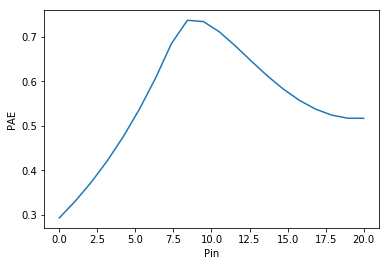

In [4]:
#Part F:III
# this function also assumes that Pdc scales with the square root of input power
def eta(Pin_lin): #                     if nonlinear                                 if linear
    nonlinear = (Gnl(Pin_lin)+1)*Pin_lin/(Vs(Vdgb)*If*np.sqrt(Pin_lin/Pmax_in_lin)/np.pi)
    linear = (Glin+1)*Pin_lin/(Vs(Vdgb)*If*np.sqrt(Pin_lin/Pmax_in_lin)/np.pi)
    return np.where(Pin_lin>Pmax_in_lin,nonlinear,linear)

plt.plot(10*np.log10(Pin_lin),eta(Pin_lin))
plt.xlabel("Pin")
plt.ylabel("PAE")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in arccos
  app.launch_new_instance()


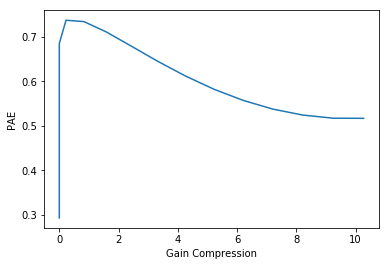

In [5]:
#Part F:IV
def Gain_complete(Pin_lin):
    nonlinear = Gnl(Pin_lin)
    linear = Glin
    return np.where(Pin_lin>Pmax_in_lin,nonlinear,linear)


gain_comp = Gain_complete(Pin_lin)/Glin
plt.plot(-10*np.log10(gain_comp),eta(Pin_lin))
plt.xlabel("Gain Compression")
plt.ylabel("PAE")
plt.show()


Part F: V
  From our previous plot in part C/I/, we can estimate $P_{sat}$ to be 19.5 dBm